In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

In [2]:
class SimpleNet(nn.Module):
    def __init__(self):
        super(SimpleNet,self).__init__()
        self.fc1 = nn.Linear(2,5)  # 2 = 입력층 수, 5 = 노드 수
        self.fc2 = nn.Linear(5,1)  # 1 = 출력층
        
    def forward(self, x):   # nn.Module 내부에서 모델이 불리면 자동으로 불려와짐  
        x = torch.relu(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))
        return x

In [9]:
x = torch.randn(100,2)
y = ((x[:,0]>0) & (x[:,1]>0)).float()
#print(x, y)

In [18]:
#모델 생성
model = SimpleNet()
print(model)

# 손실함수, 옵티마이저 지정
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

SimpleNet(
  (fc1): Linear(in_features=2, out_features=5, bias=True)
  (fc2): Linear(in_features=5, out_features=1, bias=True)
)


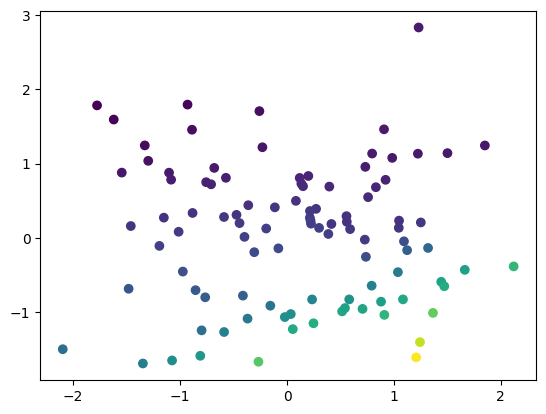

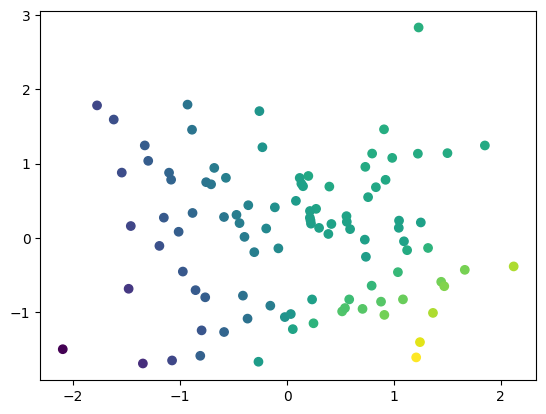

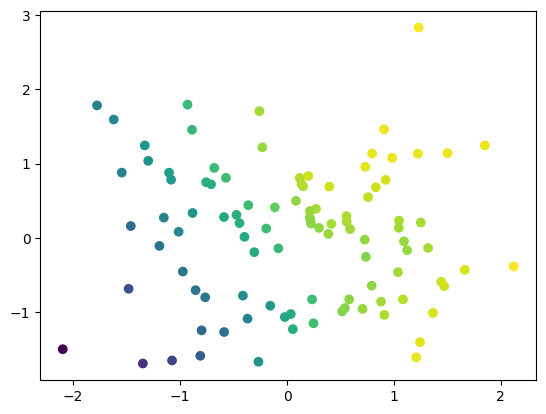

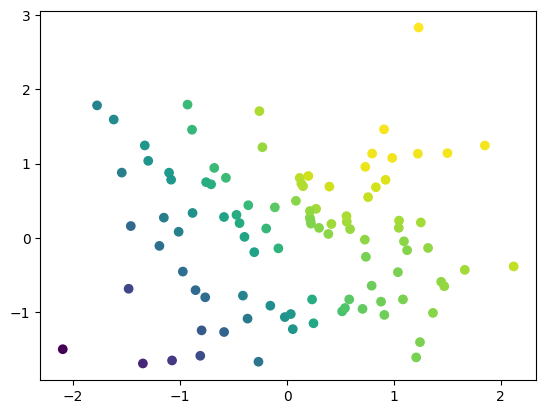

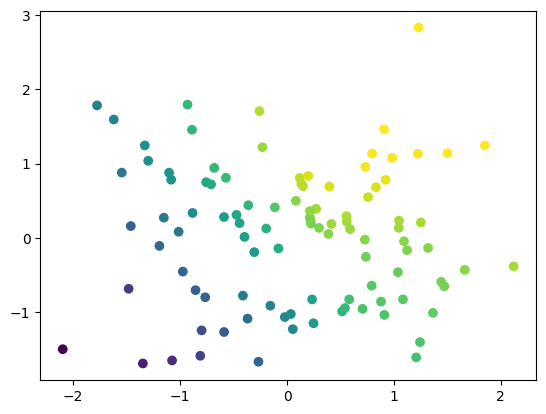

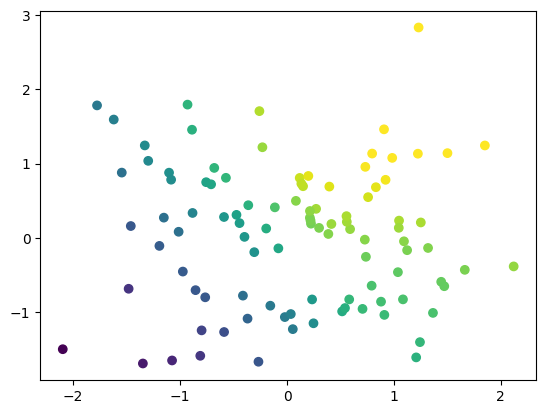

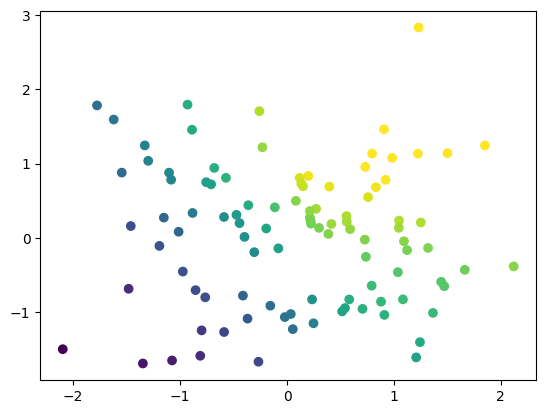

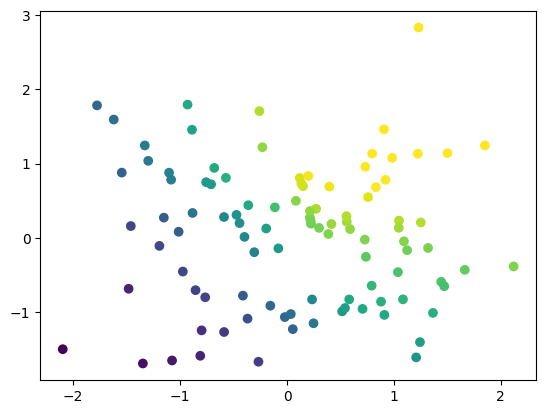

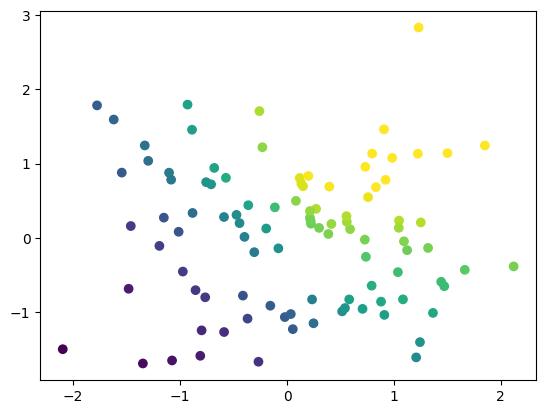

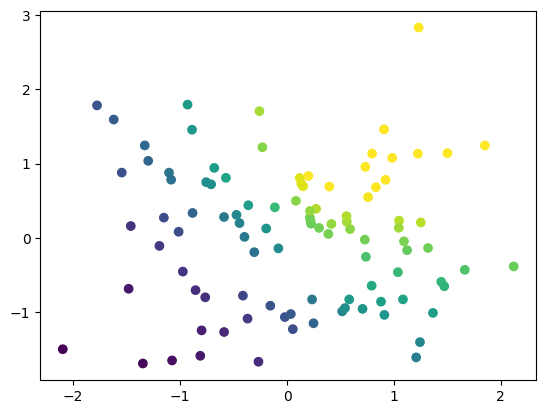

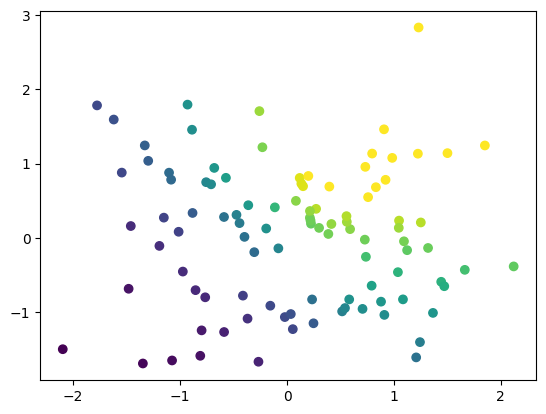

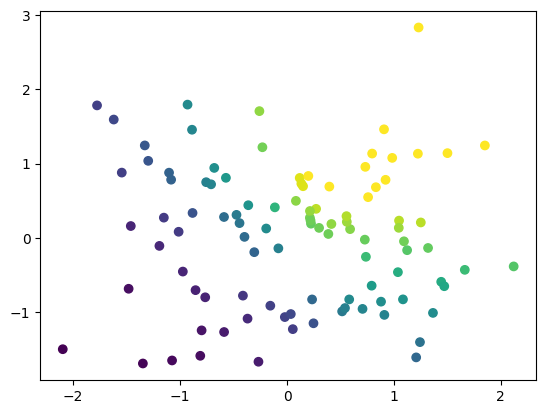

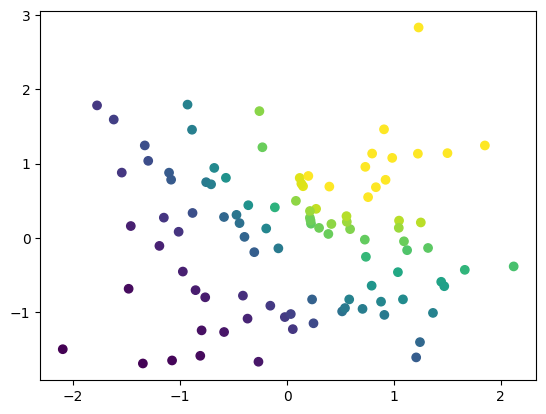

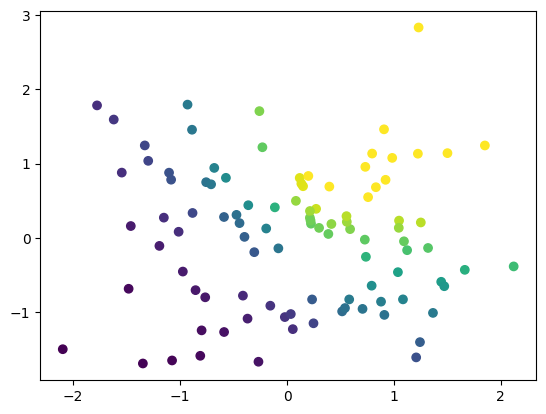

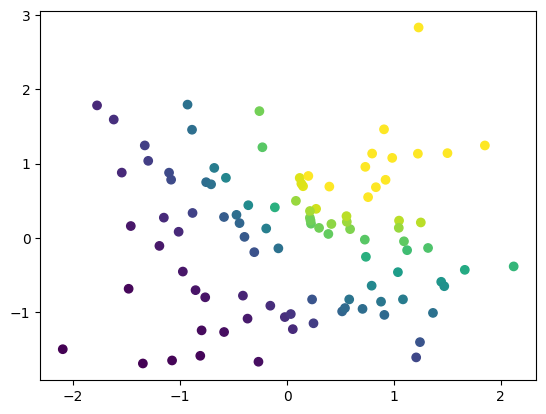

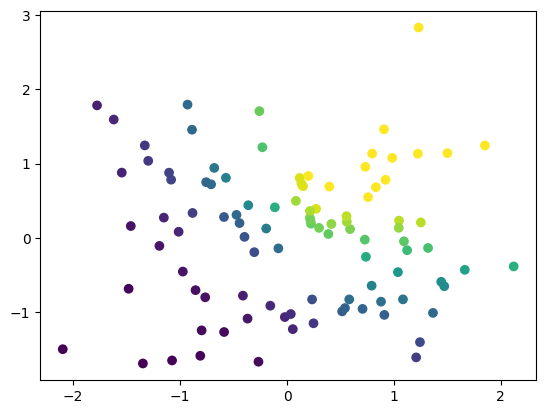

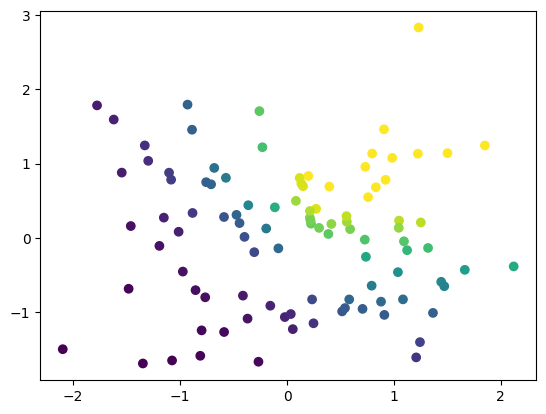

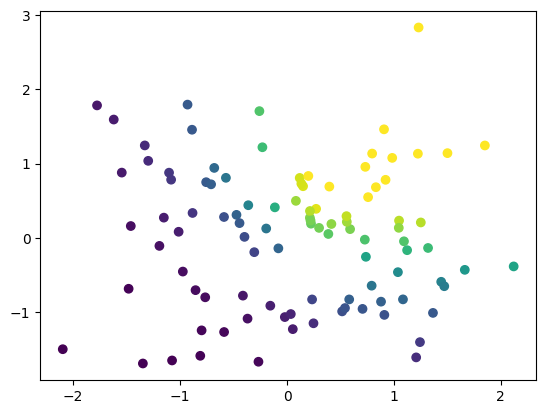

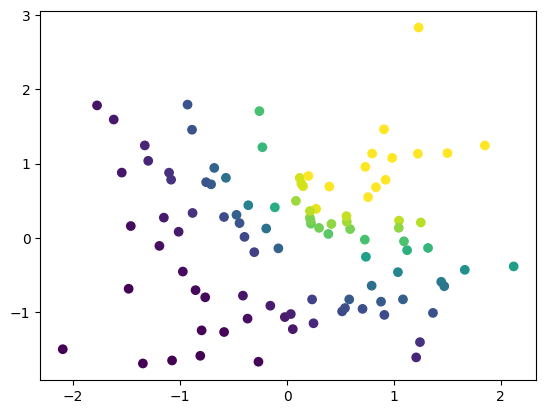

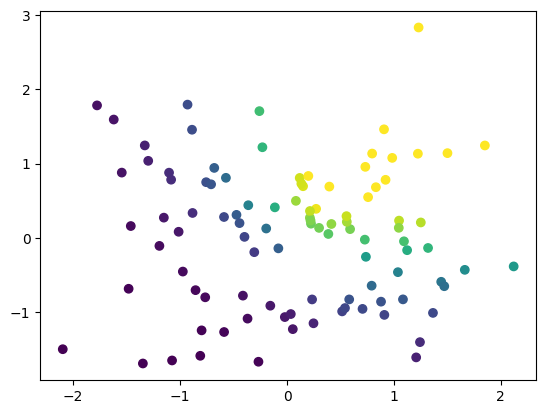

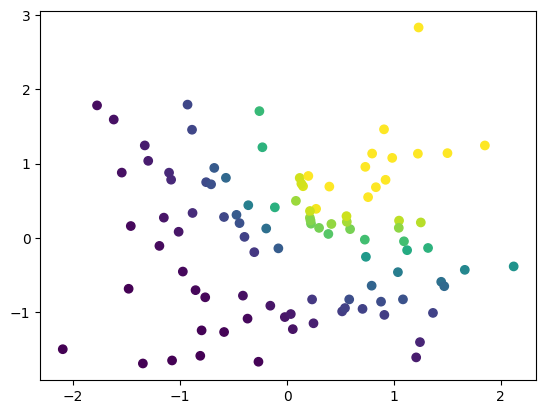

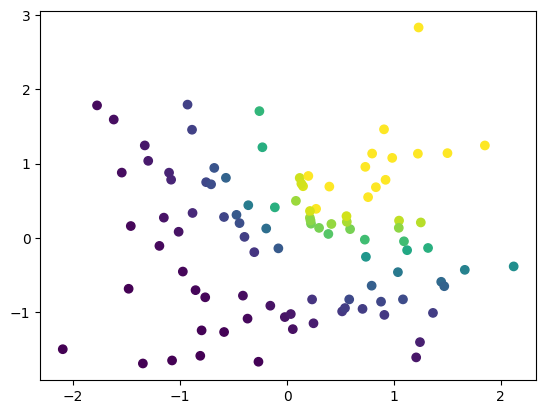

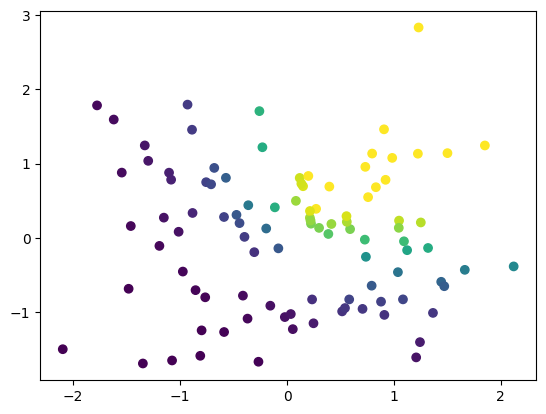

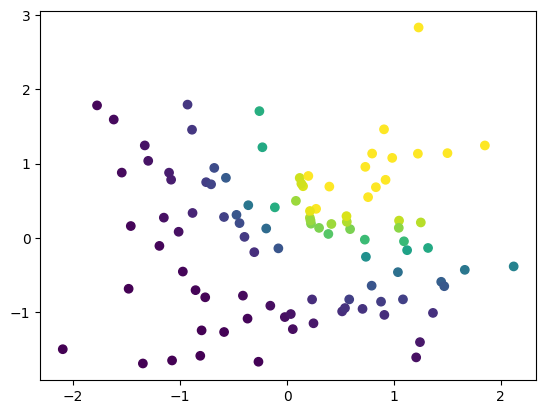

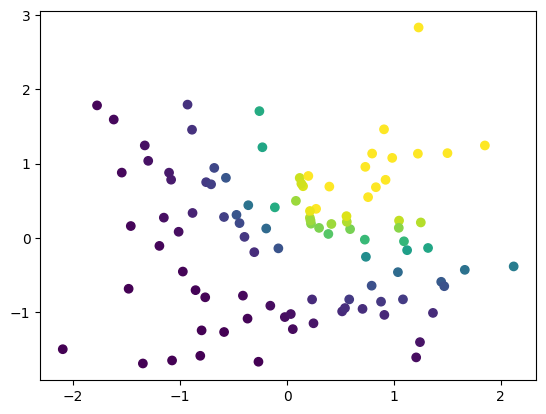

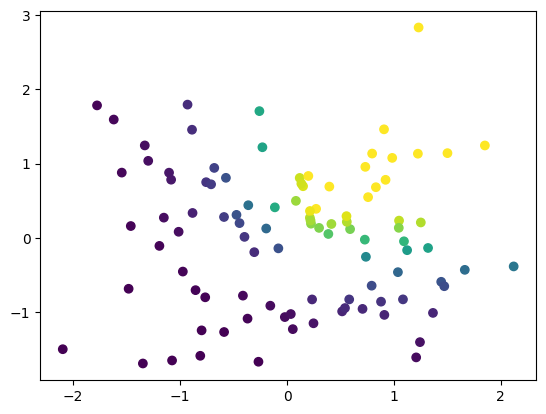

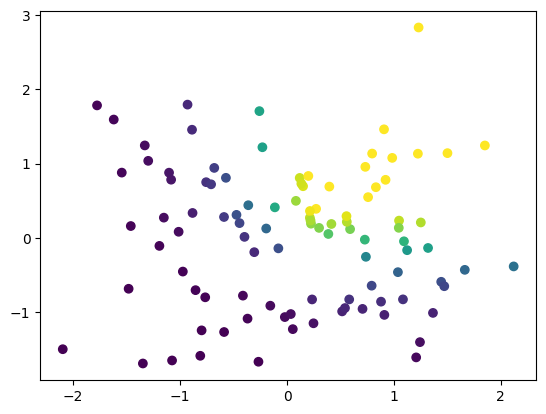

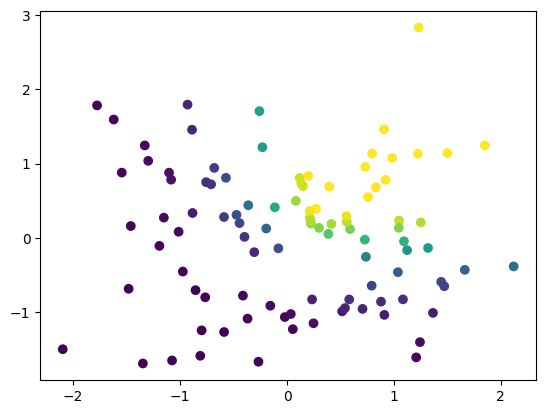

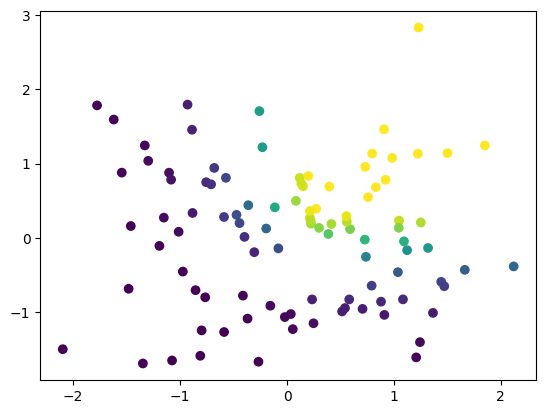

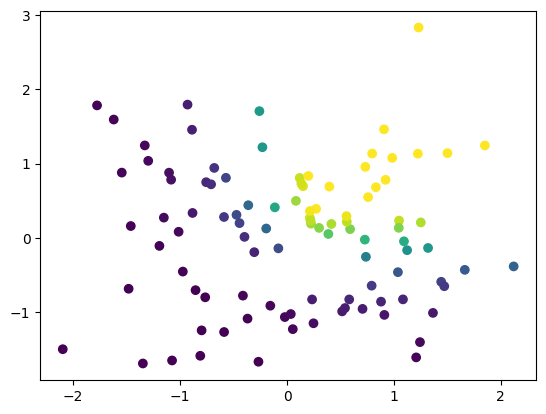

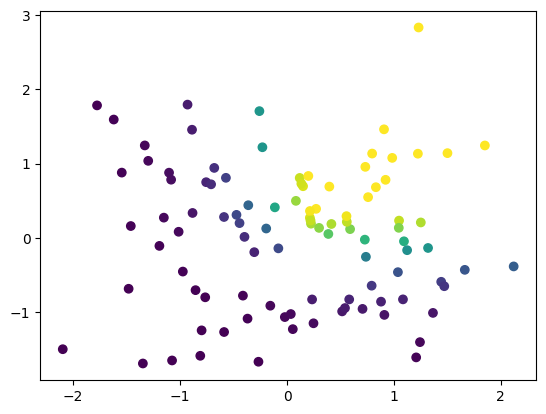

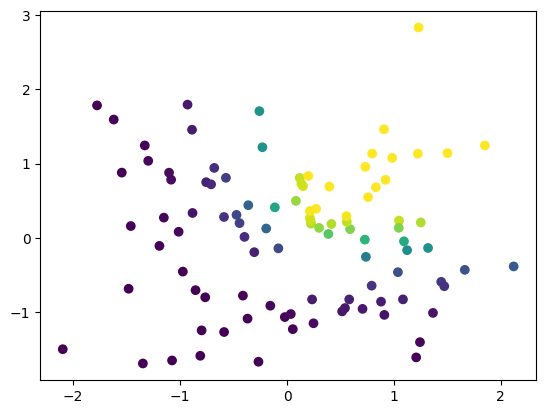

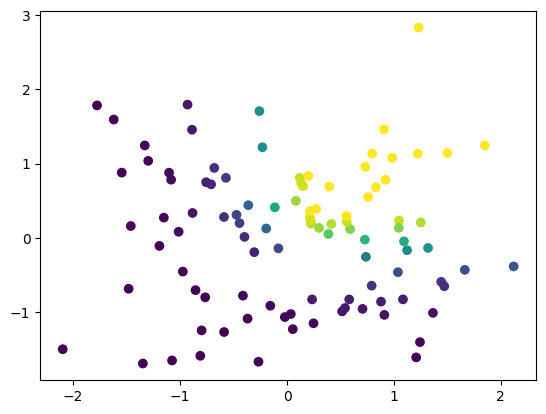

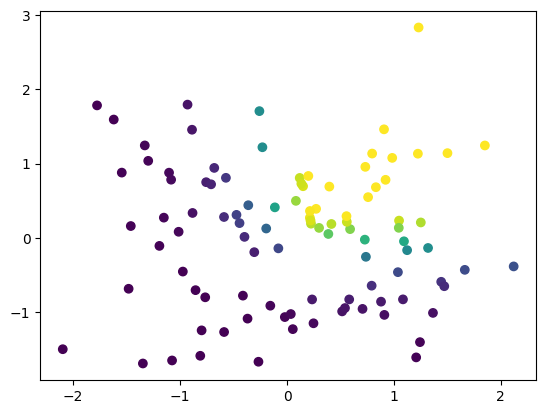

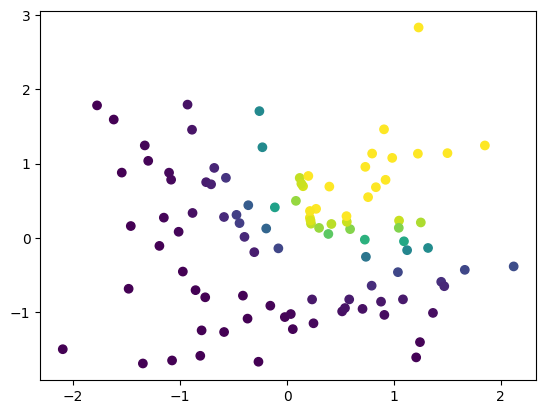

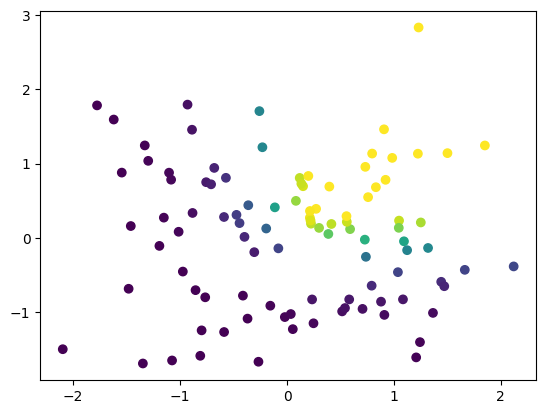

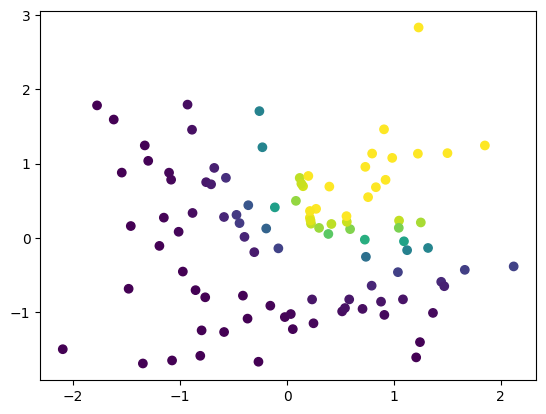

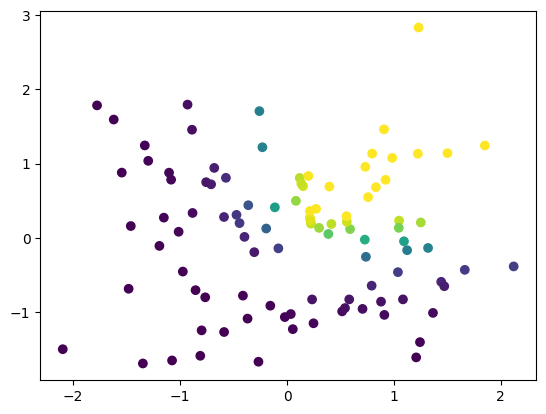

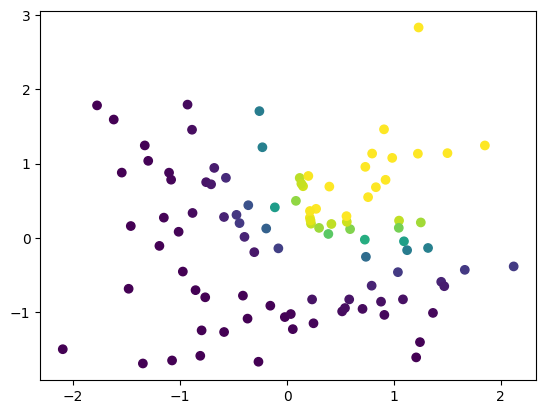

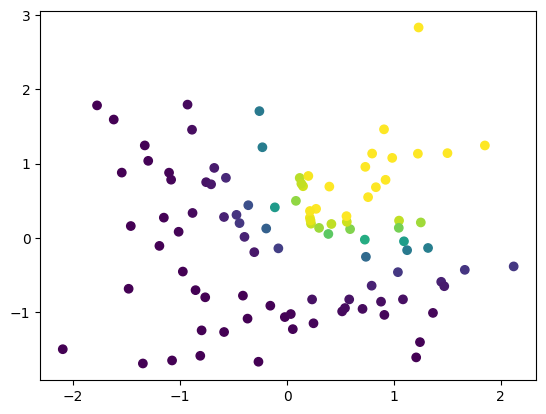

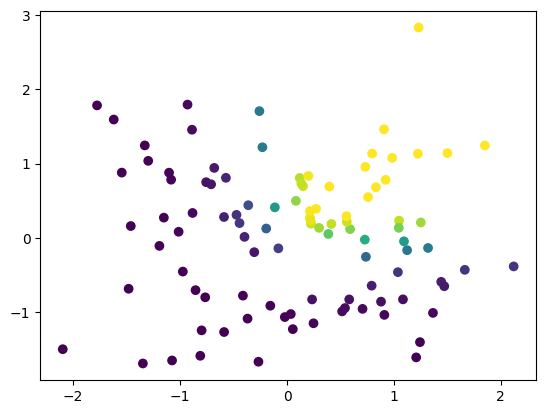

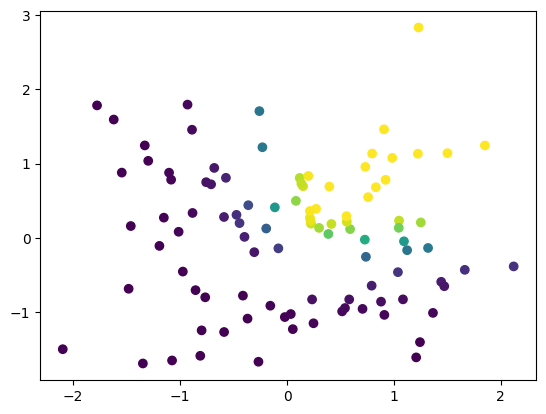

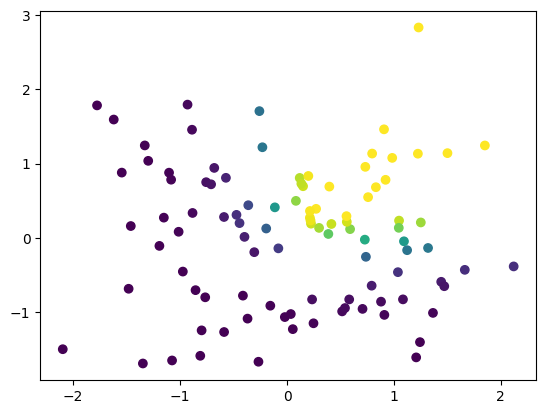

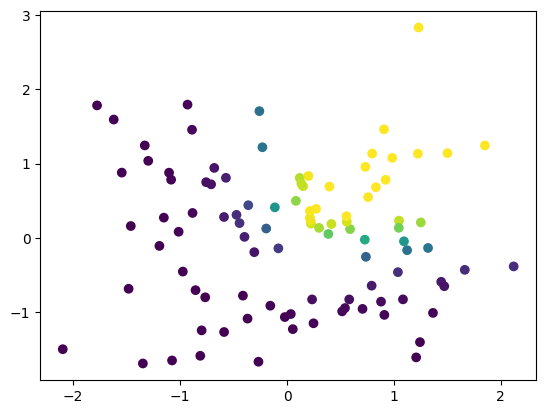

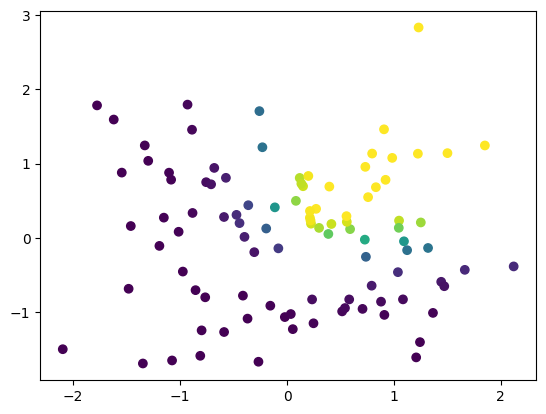

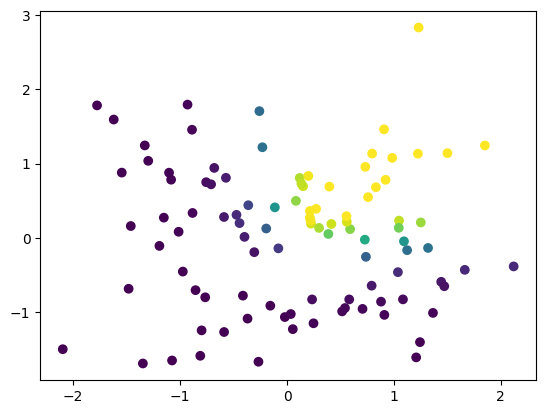

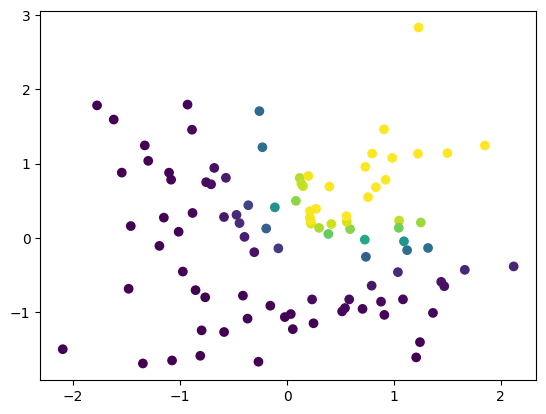

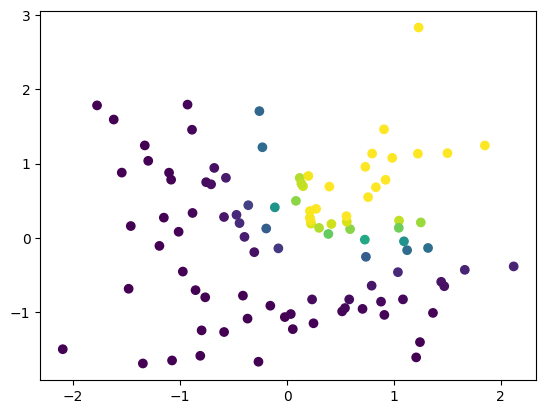

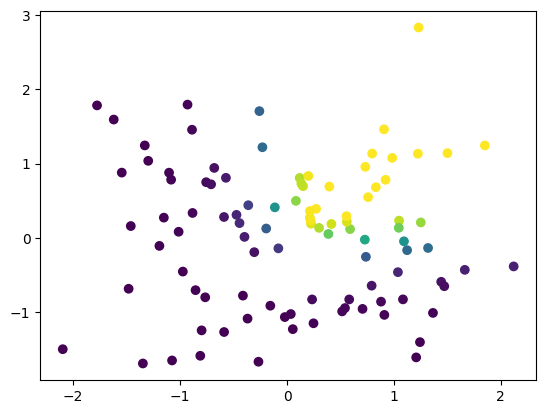

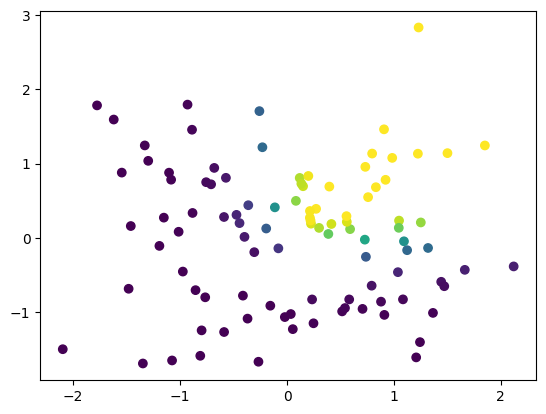

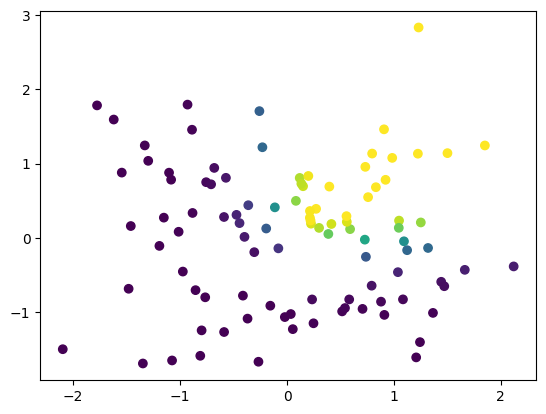

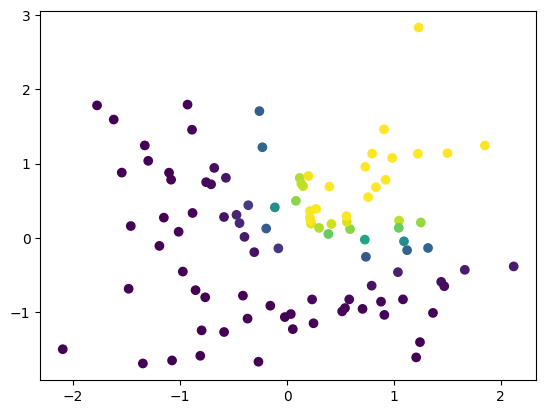

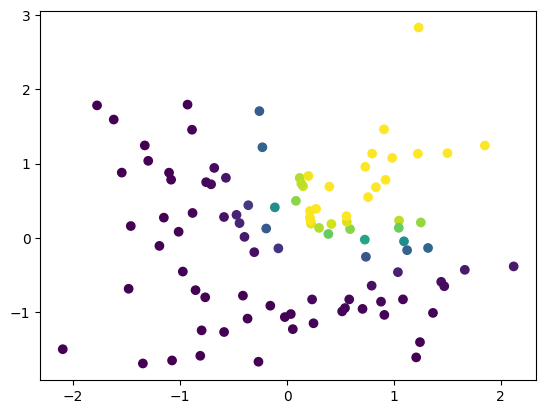

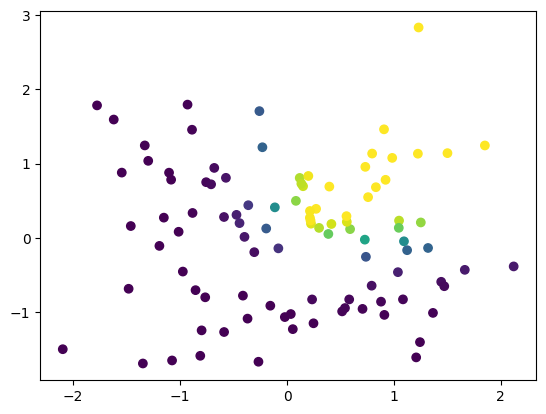

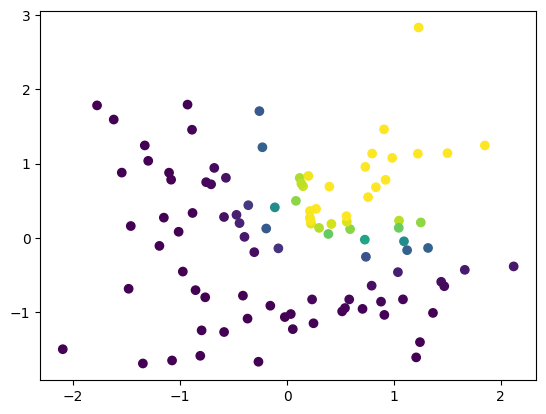

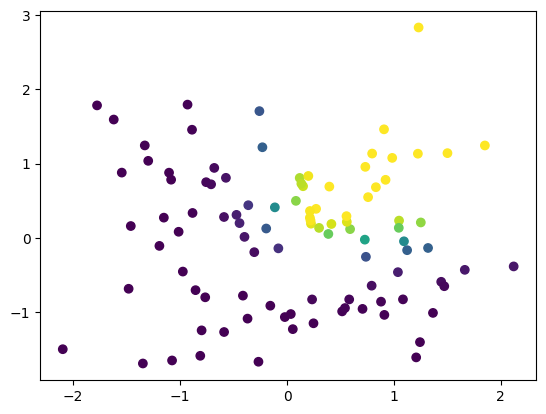

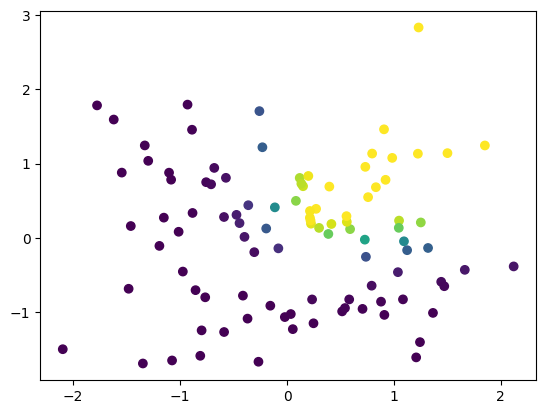

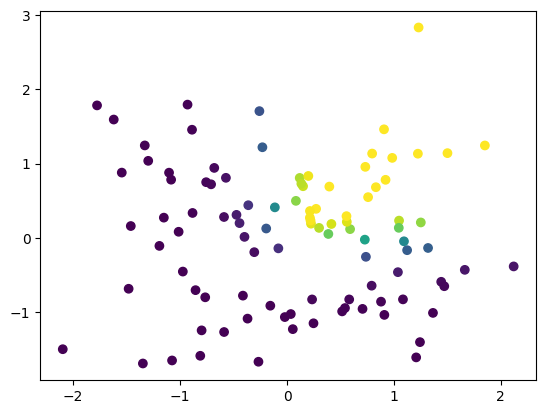

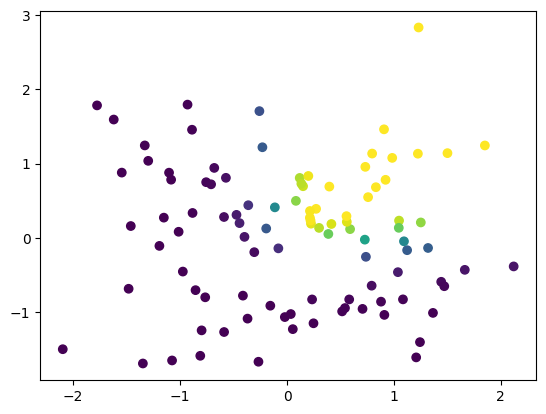

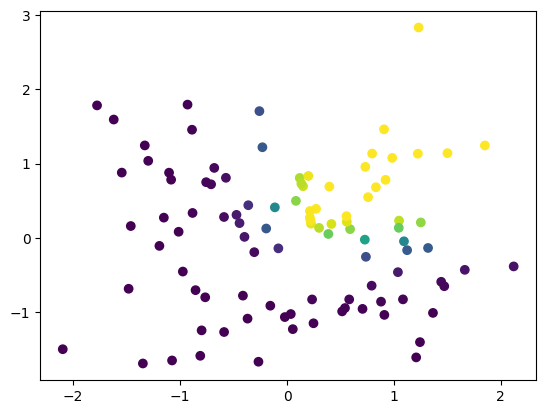

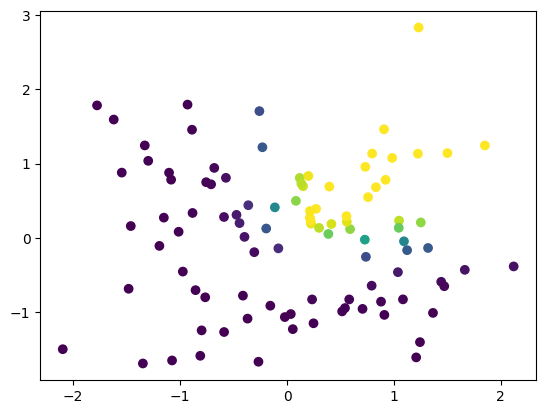

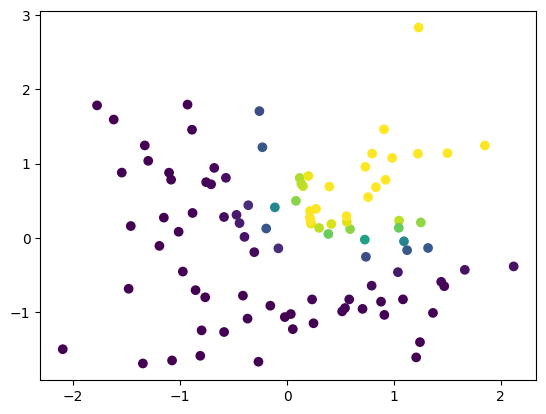

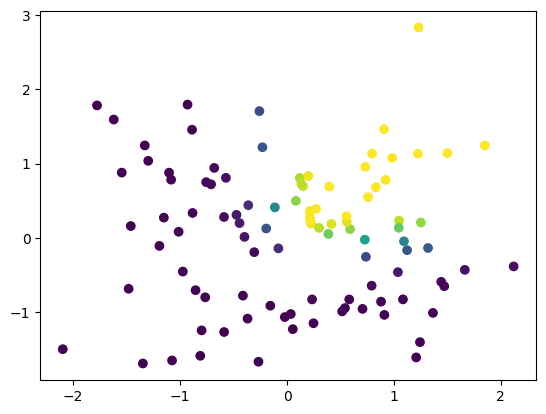

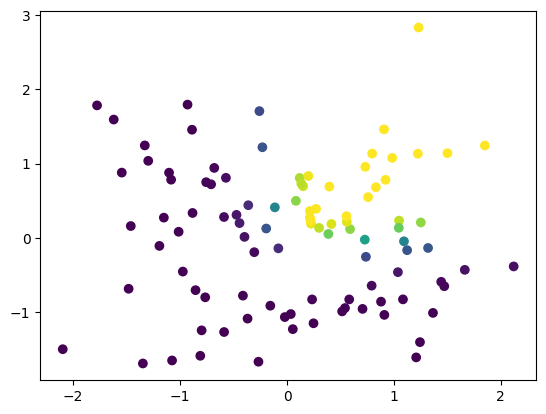

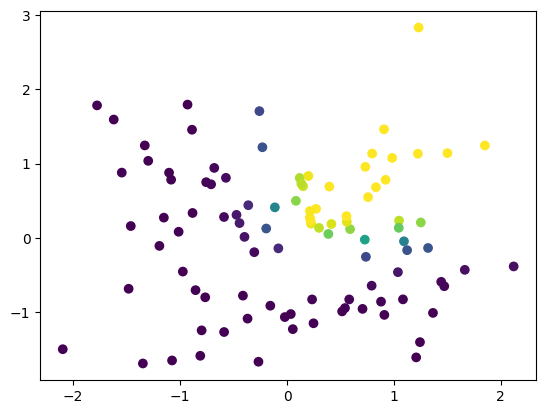

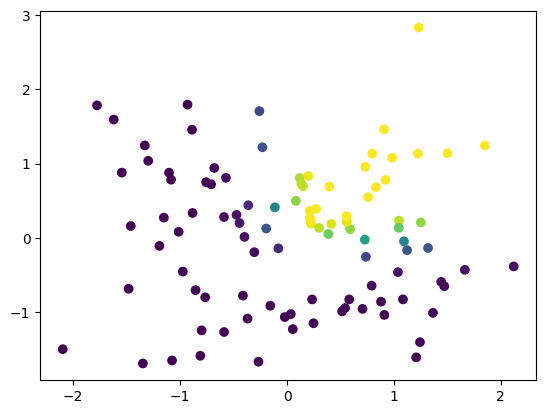

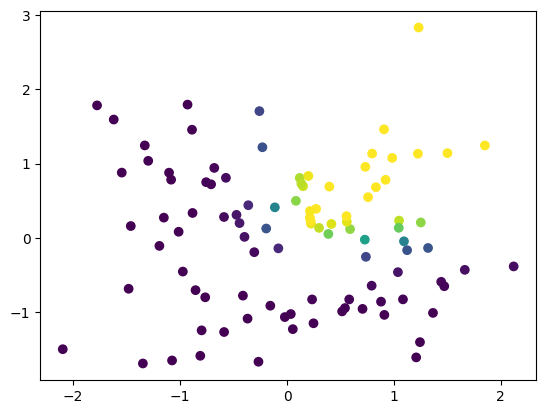

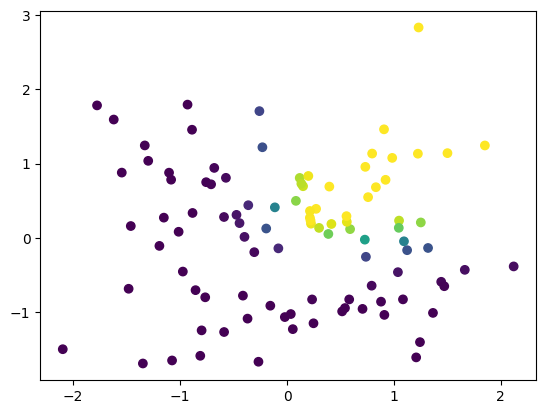

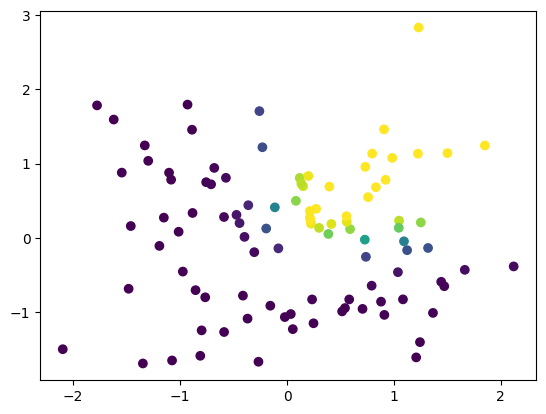

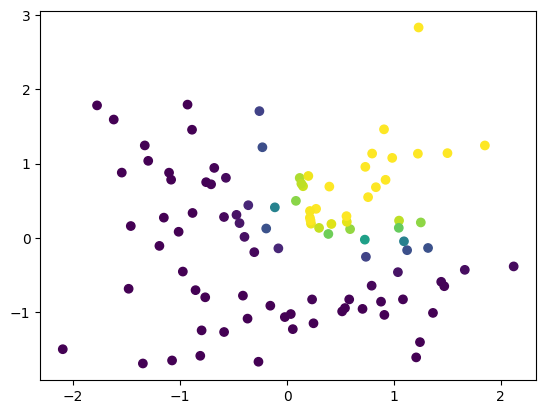

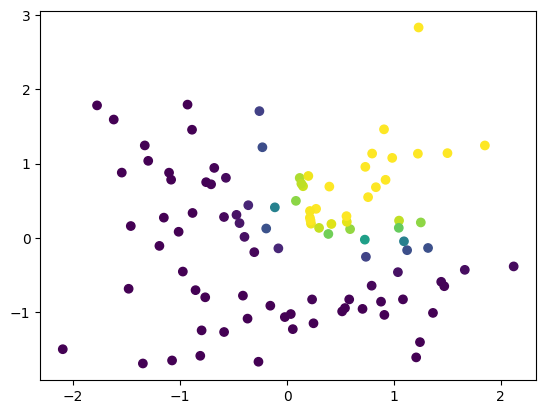

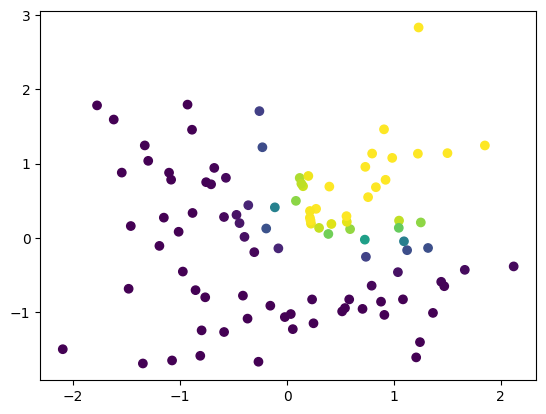

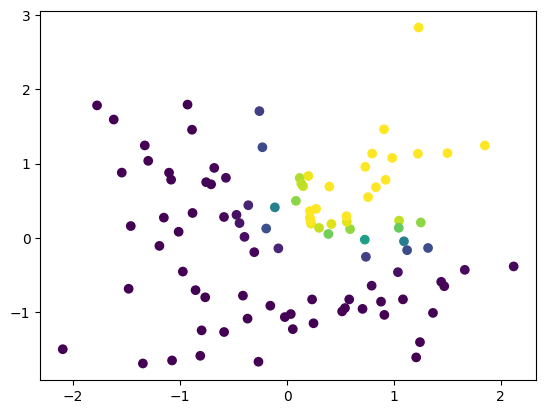

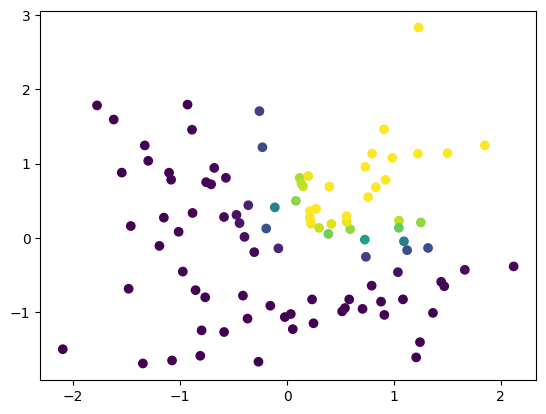

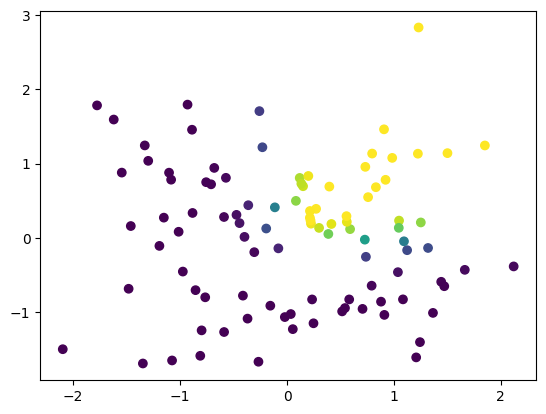

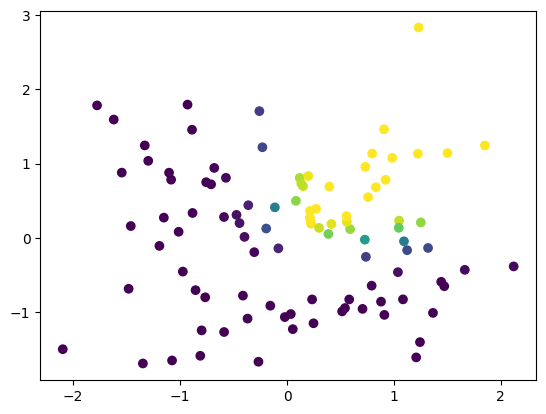

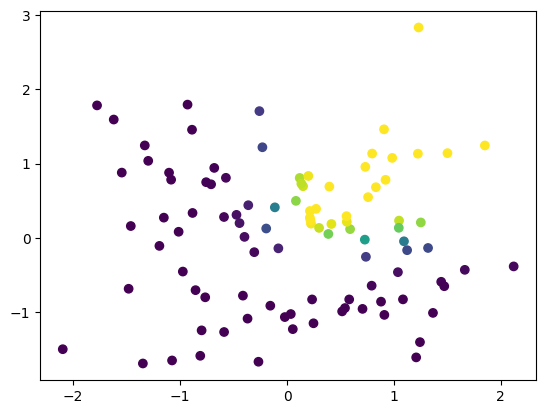

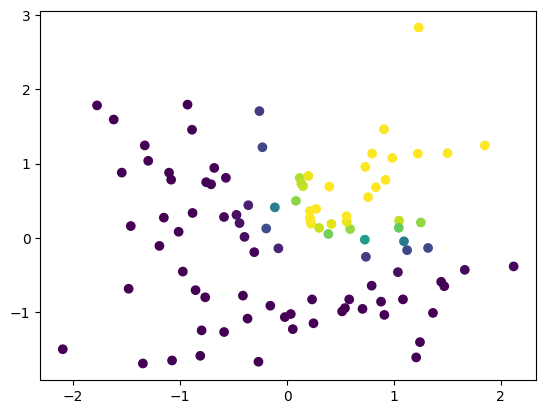

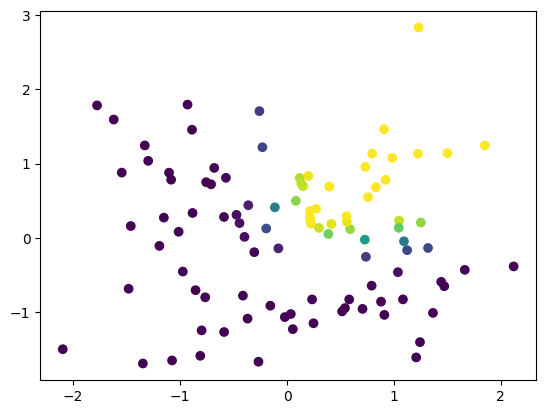

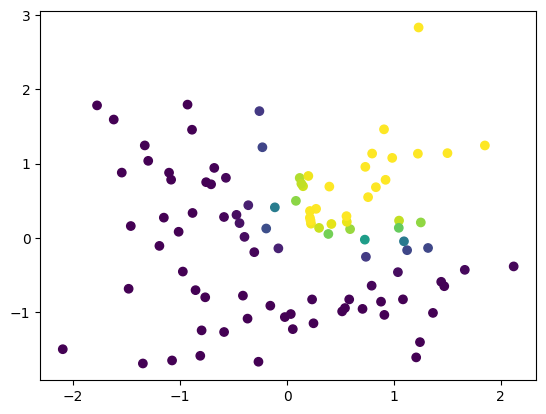

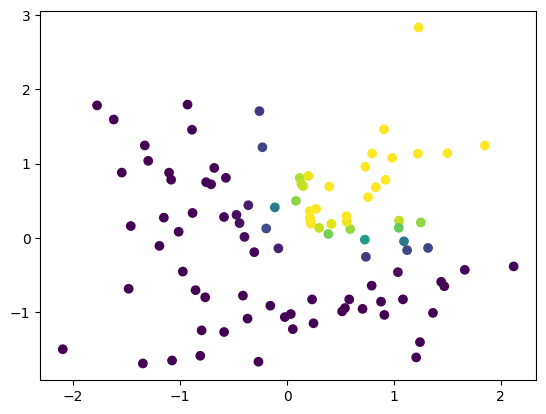

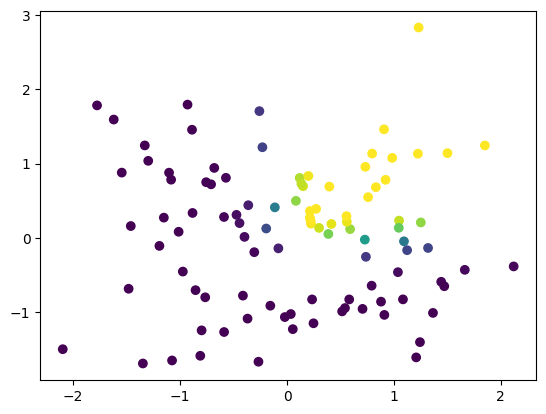

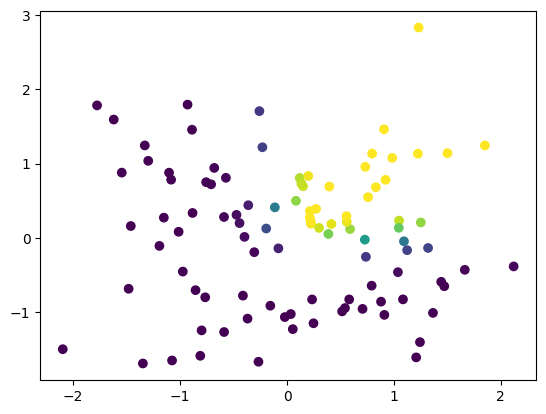

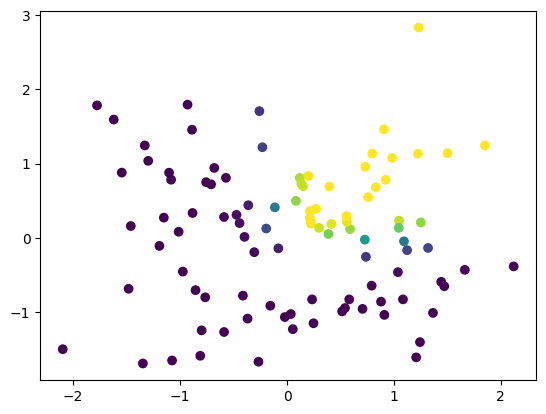

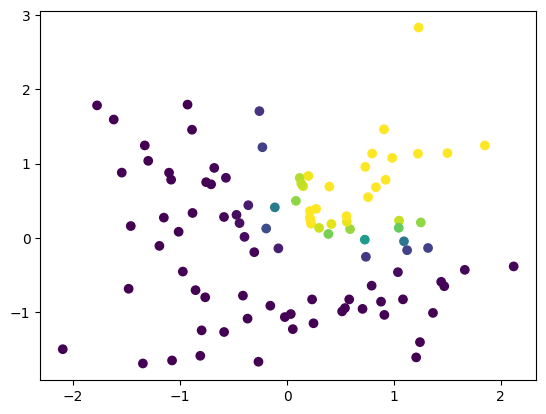

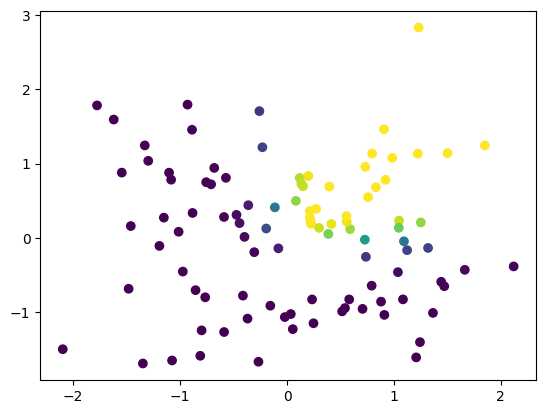

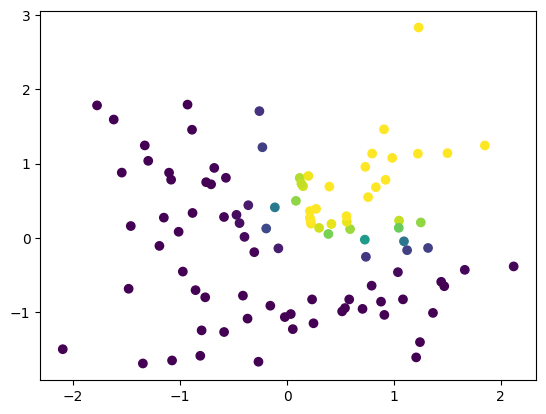

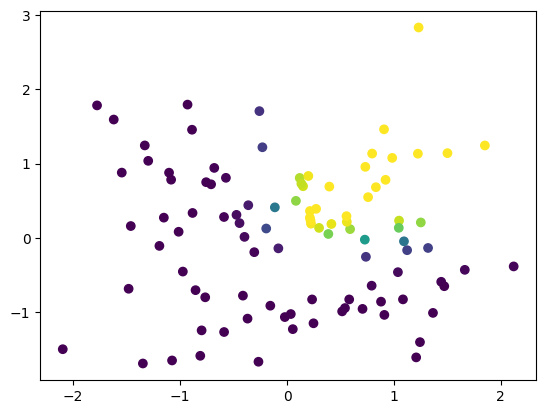

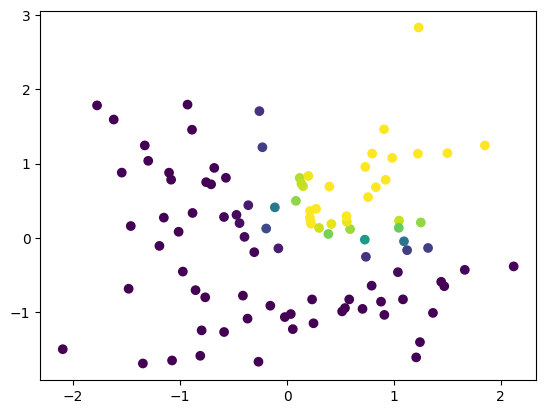

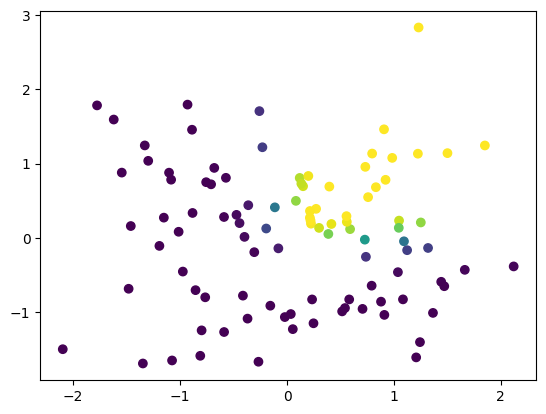

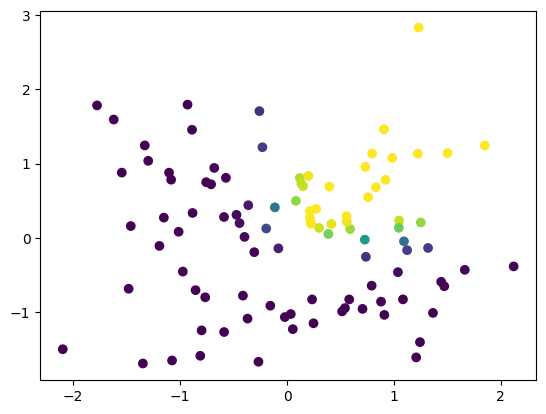

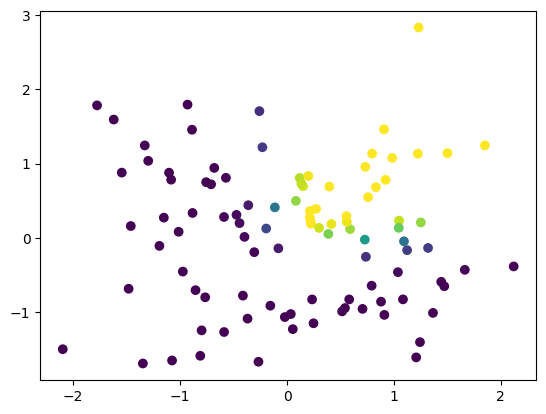

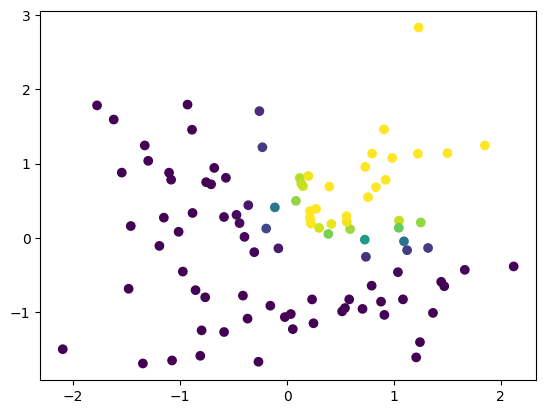

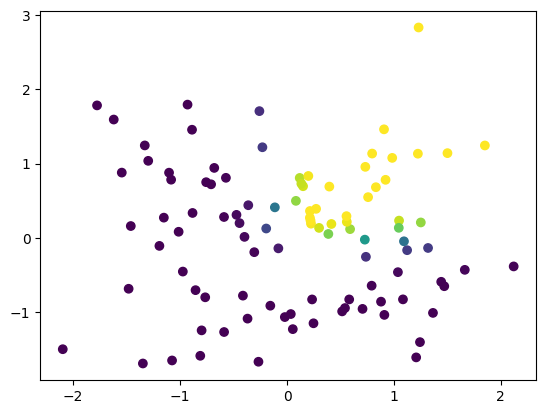

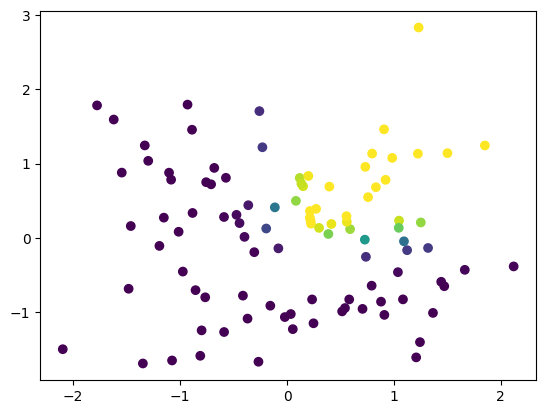

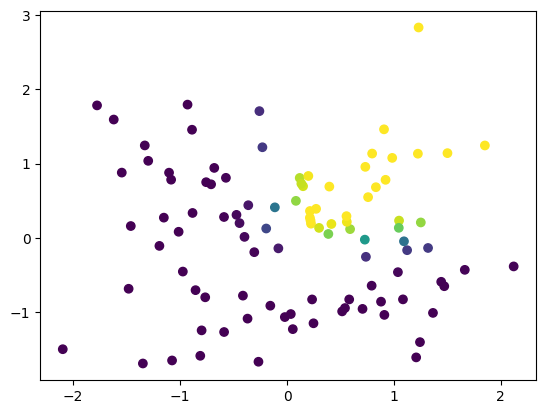

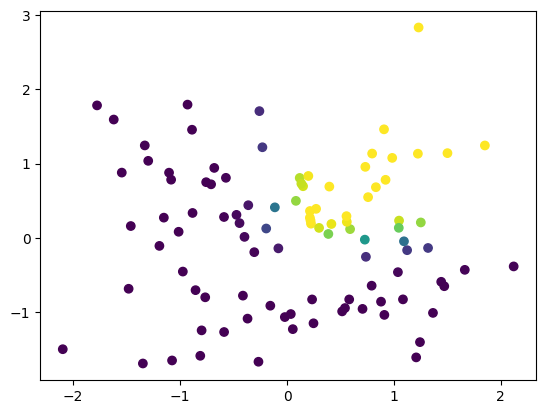

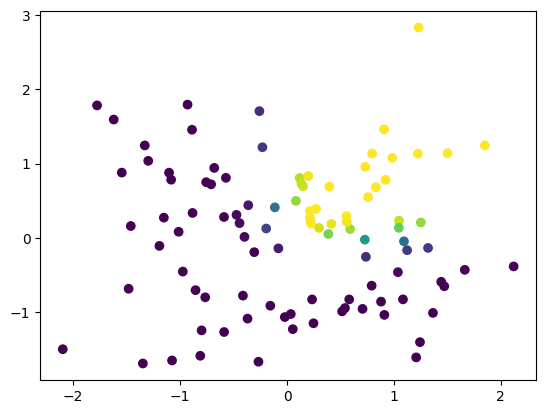

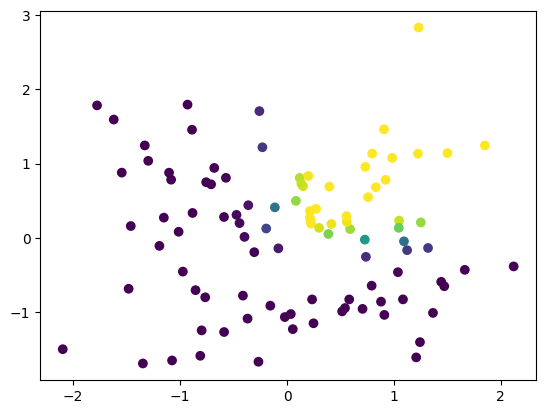

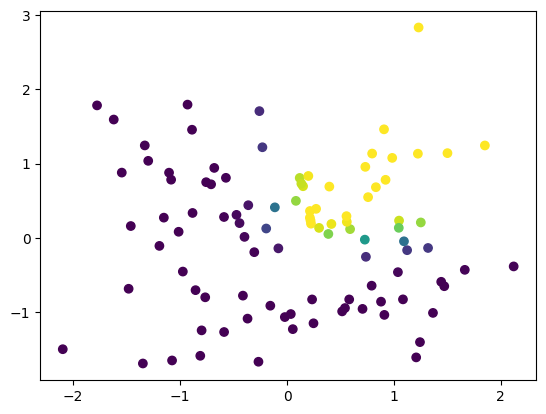

학습 종료!


In [20]:
# 학습
for epoch in range(1000):
    # 순전파
    y_pred = model(x)
    
    # 손실 계산 
    loss = criterion(y_pred.squeeze(),y)
    
    # 역전파
    optimizer.zero_grad()  # 옵티마이저 모든 가중치 0으로 초기화
    loss.backward()        # 손실함수 역전파
    optimizer.step()        # 옵티마이저 가중치 업데이트
    
    # 중간 결과 시각화
    if epoch %10 ==0:
        plt.clf()
        plt.scatter(x[:,0], x[:,1], c=y_pred.detach().numpy().squeeze())
        plt.show()
        
print('학습 종료!')
    